In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

## LOADING THE DATASET

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df = df.iloc[0:2999]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(2999, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2999 non-null   object 
 1   is_canceled                     2999 non-null   int64  
 2   lead_time                       2999 non-null   int64  
 3   arrival_date_year               2999 non-null   int64  
 4   arrival_date_month              2999 non-null   object 
 5   arrival_date_week_number        2999 non-null   int64  
 6   arrival_date_day_of_month       2999 non-null   int64  
 7   stays_in_weekend_nights         2999 non-null   int64  
 8   stays_in_week_nights            2999 non-null   int64  
 9   adults                          2999 non-null   int64  
 10  children                        2999 non-null   float64
 11  babies                          2999 non-null   int64  
 12  meal                            29

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## A. DATA CLEANING AND PREPROCESSING

### Checking for NaN Values

In [6]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              1
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              465
company                           2876
days_in_waiting_list     

Based on the info above, the NaN values from the dataset can be found on 3 columns, which are ***'country'***, ***'agent'***, and ***'company'***.

#### Cleaning 'country' Feature

In [7]:
df['country'].describe()

count     2998
unique      53
top        PRT
freq      1774
Name: country, dtype: object

In [8]:
df['country'].value_counts()

PRT    1774
ESP     343
GBR     316
IRL     143
FRA      79
DEU      38
NLD      35
CN       28
USA      27
CHE      22
BEL      22
POL      19
RUS      18
ITA      15
BRA      13
ROU      12
AUT      10
FIN       8
SWE       7
LVA       6
DNK       5
ARG       4
NOR       4
LUX       4
IND       3
AUS       3
CHN       3
CHL       2
EST       2
LTU       2
OMN       2
CZE       2
TUR       2
MOZ       2
DZA       2
MEX       2
SVN       2
MAR       2
BWA       1
ZAF       1
ALB       1
GRC       1
BLR       1
CPV       1
UKR       1
SRB       1
SMR       1
ISR       1
ZWE       1
PRI       1
ZMB       1
CYM       1
AGO       1
Name: country, dtype: int64

In [9]:
df[df['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15


In [10]:
df[df['lead_time'] == 118]['country'].value_counts()

PRT    7
GBR    3
Name: country, dtype: int64

In [11]:
df['country'] = df['country'].fillna('PRT')
df['country'].isnull().sum()

0

I replace the NaN value in ***country*** with PRT based on the ***lead_time*** feature, where based on the code above, the lead_time feature in the row where the Nan is located is 118, and PRT is the most common country in which lead_time = 118.

#### Cleaning 'agent' Feature

In [12]:
df['agent'].describe()

count    2534.000000
mean      209.990529
std        70.282437
min         2.000000
25%       208.000000
50%       240.000000
75%       241.000000
max       334.000000
Name: agent, dtype: float64

In [13]:
df['agent'].value_counts()

240.0    1242
250.0     246
241.0     151
242.0      68
40.0       56
         ... 
303.0       1
273.0       1
244.0       1
167.0       1
304.0       1
Name: agent, Length: 66, dtype: int64

In [14]:
df[df['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,Resort Hotel,0,0,2015,November,46,8,2,4,2,...,No Deposit,NaN,NaN,0,Transient,74.00,1,0,Check-Out,2015-11-14
2976,Resort Hotel,0,5,2015,November,46,9,1,0,1,...,No Deposit,NaN,NaN,0,Transient,40.00,0,0,Check-Out,2015-11-10
2978,Resort Hotel,1,0,2015,November,46,9,1,0,1,...,No Deposit,NaN,270.0,0,Transient,35.00,0,0,Canceled,2015-11-09
2981,Resort Hotel,0,14,2015,November,46,9,1,3,1,...,No Deposit,NaN,47.0,0,Transient,35.00,0,0,Check-Out,2015-11-13


In [15]:
# df['lead_time'].value_counts()

In [16]:
# df[df['lead_time'] == 78]['agent'].value_counts()

In [17]:
# df[df['lead_time'] == 4]['agent'].value_counts()

In [18]:
# df[df['lead_time'] == 0]['agent'].value_counts()

In [19]:
# df[df['lead_time'] == 1]['agent'].value_counts()

In [20]:
# df[df['lead_time'] == 2]['agent'].value_counts()

In [21]:
df['agent'] = df['agent'].fillna('0')
df['agent'].isnull().sum()

0

I was trying to replace the Nan values on the 'agent' feature based on lead_time, arrival_date_month and arrival_date_week_number, but most of them have '240' as the most common agent. After I read the description and explanation of the dataset that can be found on the internet, the author(s) describe the 'agent' feature as "ID of the travel agency that made the bookinga'. So, those who has 'agent' in the dataset are the only ones that made the book through travel agency, and those who don't have 'agent' or the value is Nan, are those who did not make the book through travel agency. So, based on that, I think it is best to fill the Nan values with 0 other than fill them with the agent which would make the dataset different from the original.

#### Cleaning 'company' Feature

In [22]:
df['company'].describe()

count    123.000000
mean     221.178862
std       83.433790
min       12.000000
25%      115.500000
50%      270.000000
75%      281.000000
max      318.000000
Name: company, dtype: float64

In [23]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47.])

In [24]:
df['company'].value_counts()

281.0    43
110.0    18
307.0     8
268.0     7
94.0      5
223.0     4
317.0     4
154.0     4
113.0     3
174.0     3
270.0     3
195.0     3
59.0      2
178.0     2
274.0     2
312.0     2
240.0     2
204.0     1
286.0     1
53.0      1
318.0     1
47.0      1
118.0     1
12.0      1
144.0     1
Name: company, dtype: int64

In [25]:
df[df['company'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2995,Resort Hotel,1,42,2015,November,46,10,0,5,2,...,No Deposit,250,NaN,0,Transient,47.7,0,0,Canceled,2015-10-16
2996,Resort Hotel,1,39,2015,November,46,10,0,5,1,...,No Deposit,281,NaN,0,Transient-Party,40.0,0,0,Canceled,2015-10-10
2997,Resort Hotel,0,36,2015,November,46,10,0,5,2,...,No Deposit,250,NaN,0,Transient,73.2,1,0,Check-Out,2015-11-15


In [26]:
print("Percentage of NaN values in 'company' feature is: ")
print(2876/3000)

Percentage of NaN values in 'company' feature is: 
0.9586666666666667


In [27]:
df = df.drop(['company'], axis=1)

I choose to drop the entire 'company' feature because the Nan in that feature is about 96% of the data. If I choose to mofify the data, it could make a huge difference to the data, and could change the entire data, especially in the company feature. 

In [28]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

The data has been cleaned.

## B. EXPLORATORY DATA ANALYSIS 

In [29]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [30]:
correlation = df.corr()["is_canceled"]
correlation.abs().sort_values(ascending=False)[1:]

required_car_parking_spaces       0.286929
lead_time                         0.209389
booking_changes                   0.128580
adr                               0.096207
adults                            0.075404
days_in_waiting_list              0.063694
total_of_special_requests         0.059526
arrival_date_day_of_month         0.051144
stays_in_week_nights              0.044800
children                          0.035620
stays_in_weekend_nights           0.019780
babies                            0.014373
arrival_date_week_number          0.010482
arrival_date_year                      NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
Name: is_canceled, dtype: float64

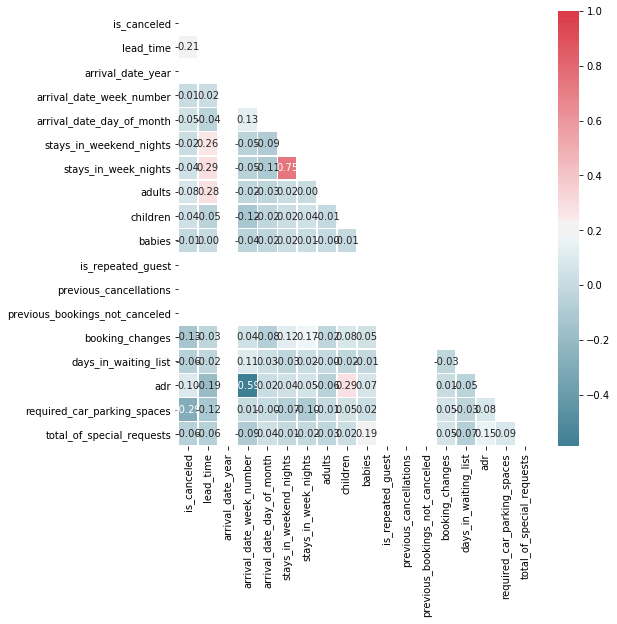

In [31]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

Based on the codes above, we can conclude than the features who have the biggest correlation to the target ('is_cancelled') are required_car_parking_spaces, lead_time, booking_changes, adr, and adults.

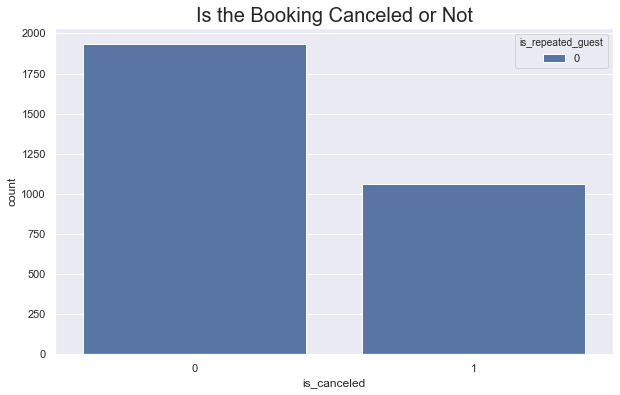

In [32]:
plt.figure(figsize=(10,6))
sns.set(style = "darkgrid")
plt.title("Is the Booking Canceled or Not", fontdict = {'fontsize': 20})
axis = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df)

Based on the visualization above, we can see the comparation between the cancelled bookings and not cancelled bookings, with 0 is the not cancelled booking, and 1 is the cancelled bookings. With all the customers in this dataset is repeated guest, which all of them did not cancel their hotel bookings.

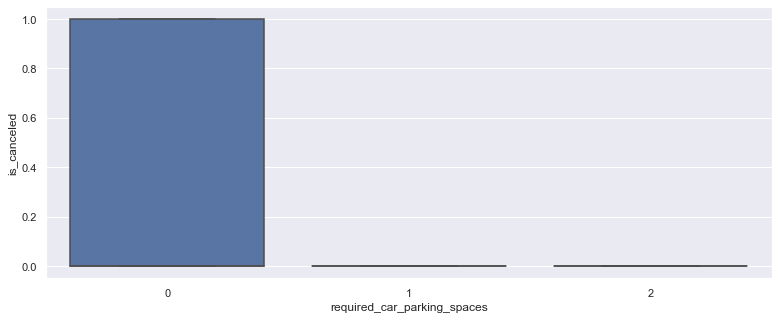

In [33]:
plt.figure(figsize = (13,5))
sns.boxplot(x = 'required_car_parking_spaces', y = 'is_canceled', data = df);

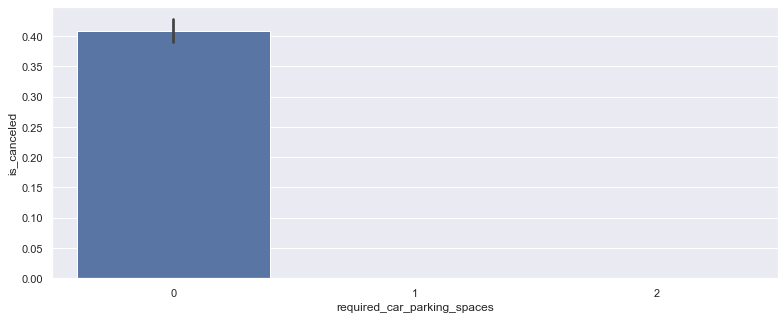

In [34]:
plt.figure(figsize = (13,5))
sns.barplot(x = 'required_car_parking_spaces', y = 'is_canceled', data = df);

From the visualizations above, most of the bookings canceled came from those who only require 1 parking space.

In [35]:
df[df['required_car_parking_spaces'] == 0]['is_canceled'].value_counts()

0    1543
1    1063
Name: is_canceled, dtype: int64

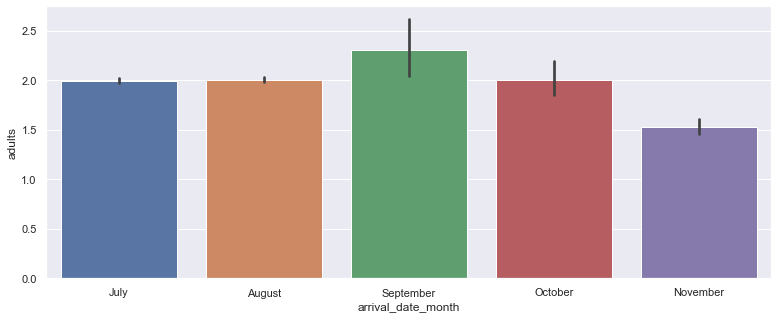

In [36]:
plt.figure(figsize = (13,5))
sns.barplot(x ='arrival_date_month', y = 'adults', data = df)

Based on the plot above, most of the adults arrive at their hotels in September, with over 2.0 adults.

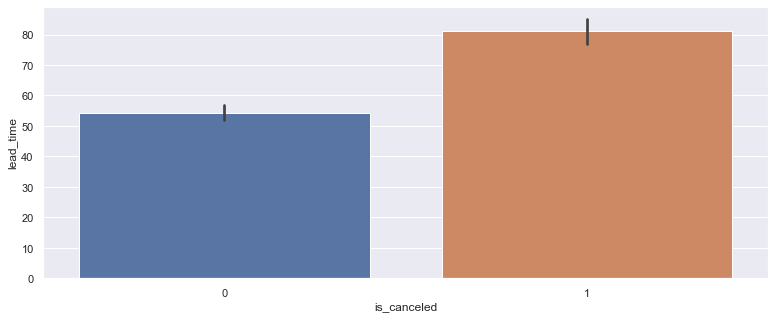

In [37]:
plt.figure(figsize = (13,5))
sns.barplot(x = 'is_canceled', y = 'lead_time', data = df);

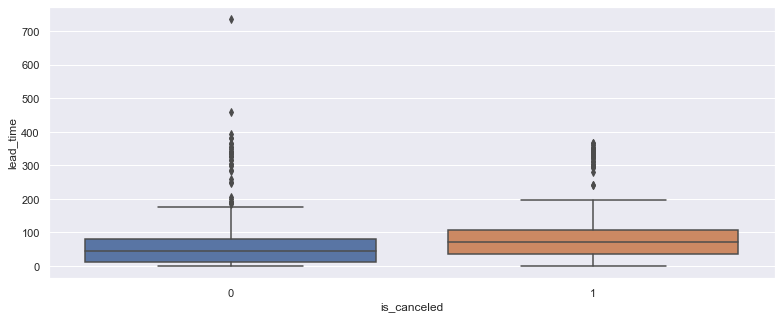

In [38]:
plt.figure(figsize = (13,5))
sns.boxplot(x = 'is_canceled', y = 'lead_time', data = df);

The plots above suggest that people who cancelled their hotel bookings have more lead time (the difference between the time they book and the day they arrived) than those who did not cancal their bookings.

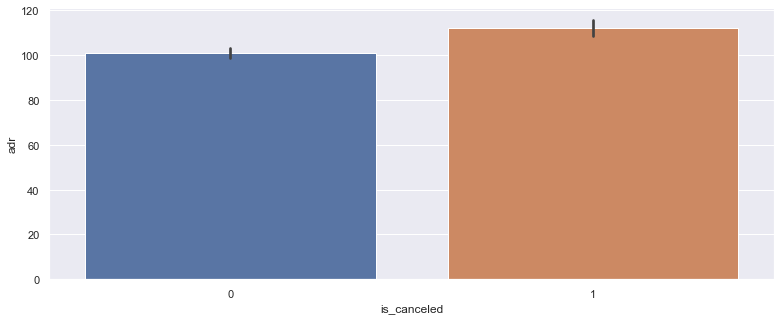

In [39]:
plt.figure(figsize = (13,5))
sns.barplot(x = 'is_canceled', y = 'adr', data = df);

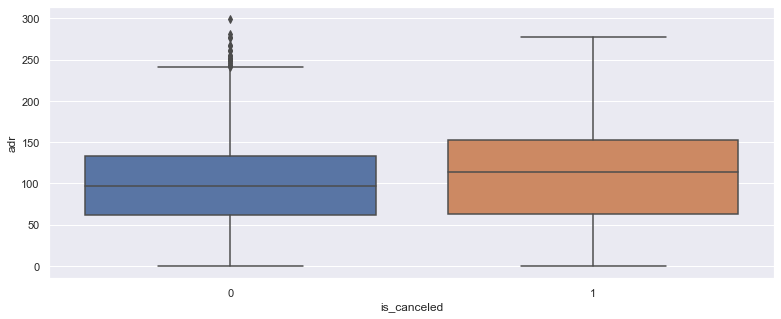

In [40]:
plt.figure(figsize = (13,5))
sns.boxplot(x = 'is_canceled', y = 'adr', data = df);

The plots above suggest that people who cancelled their hotel bookings have more Average Daily Rate (calculated by dividing the sum of all lodging transactions by the total number of staying nights) than those who did not cancal their bookings.

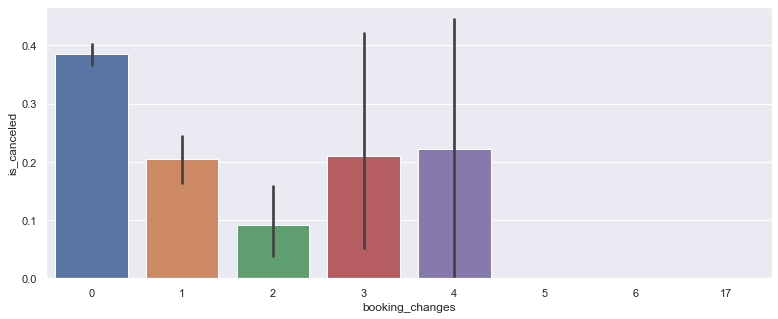

In [41]:
plt.figure(figsize = (13,5))
sns.barplot(x = 'booking_changes', y = 'is_canceled', data = df);

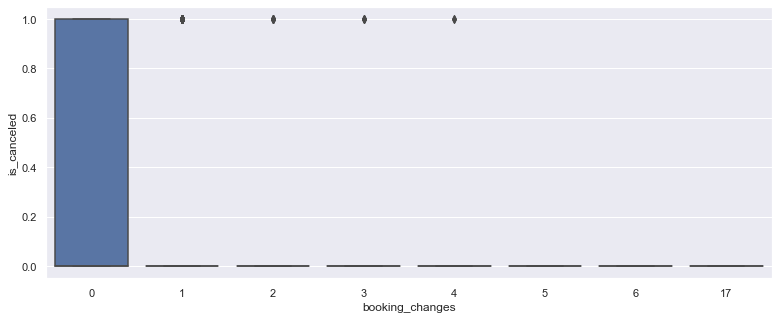

In [42]:
plt.figure(figsize = (13,5))
sns.boxplot(x = 'booking_changes', y = 'is_canceled', data = df);

The plots above suggest that people who did not cancel their hotel bookings have 0 booking changes than those who  cancalled their bookings.

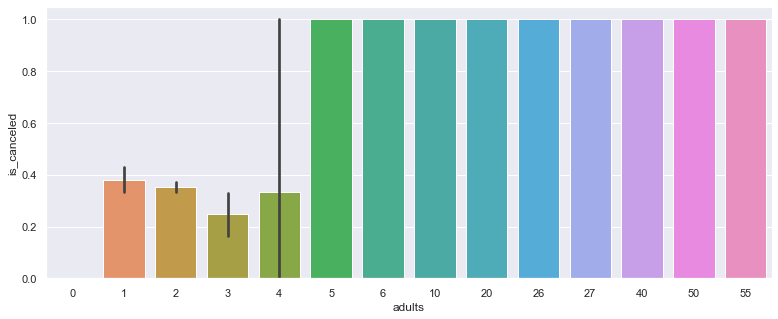

In [43]:
plt.figure(figsize = (13,5))
sns.barplot(x = 'adults', y = 'is_canceled', data = df);

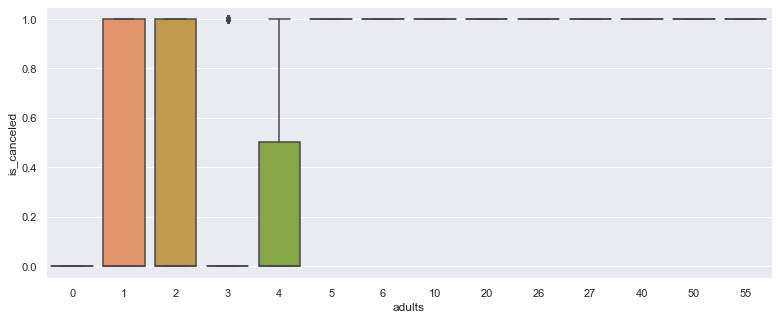

In [44]:
plt.figure(figsize = (13,5))
sns.boxplot(x = 'adults', y = 'is_canceled', data = df);

The plots above suggest that people who are more than 5 adults, all cancelled their hotel bookings, while people who are 0 adults did not cancel their bookings.

## C. MODEL BUILDING & HYPERPARAMETER TUNING

### Splitting Dataset

In [55]:
df_new = df.copy()[['required_car_parking_spaces','lead_time','booking_changes','adr','adults', 'is_canceled']]
df_new.head()

,required_car_parking_spaces,lead_time,booking_changes,adr,adults,is_canceled
0,0,342,3,0.0,2,0
1,0,737,4,0.0,2,0
2,0,7,0,75.0,1,0
3,0,13,0,75.0,1,0
4,0,14,0,98.0,2,0


In [56]:
x = df_new.drop(['is_canceled'], axis=1)
y = df_new['is_canceled']

I am trying to split the dataset based on the top 5 that have the biggest correlation to the target (is_cancelled) which are required_car_parking_spaces','lead_time','booking_changes','adr','adults', 'is_canceled'

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

Trying the train test split

### Fitting Model

### Logistic Regression

In [69]:
model_LogReg_Asli = LogisticRegression()
model_LogReg_Asli.fit(x_train, y_train)
print(model_LogReg_Asli.coef_)
print(model_LogReg_Asli.intercept_)

m = model_LogReg_Asli.coef_[0][0]
c = model_LogReg_Asli.intercept_[0]

[[-4.05812101  0.0065949  -0.77725534  0.00978826  0.08451063]]
[-2.01165506]


model_LogReg_Asli is the original model that used Logistic Regression before Hypermeter Tuning

### Predict

In [114]:
# prediksi
y_pred_lr = model_LogReg_Asli.predict(x_test) 

In [115]:
#trying to predict using model
coba = x_test.iloc[:1]
model.predict(coba)
coba

,required_car_parking_spaces,lead_time,booking_changes,adr,adults
2399,0,12,0,50.4,2


### Model Performance

In [116]:
model_LogReg_Asli.score(x_train, y_train)

0.68528553563985

In [117]:
model_LogReg_Asli.score(x_test, y_test)

0.6933333333333334

model_LogReg_Asli only has about 69.3% accuracy

### Model Parameter

In [73]:
# Parameter yang dipakai di model asli
model_LogReg_Asli.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [74]:
# parameter model linear regression yang akan dituned + nilai yang mungkin

penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

### **Randomized Search CV**

In [76]:
from sklearn.model_selection import RandomizedSearchCV
model_LR = LogisticRegression()
model_LR_RS = RandomizedSearchCV(
    estimator = model_LR, param_distributions= param, cv = 5
)

model_LR_RS is the model that used Logistic Regression with Hypermeter Tuning (Randomized)

In [77]:
model_LR_RS.fit(x_train, y_train)
model_LR_RS.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 1}

In [78]:
model_LogReg_Asli.score(x_test, y_test)

0.6933333333333334

In [79]:
model_LogReg_Baru = LogisticRegression(solver='saga', penalty = 'l2', max_iter = 10000)

model_LogReg_Baru.fit(x_train, y_train)
model_LogReg_Baru.score(x_test, y_test)

0.6933333333333334

model_LogReg_Baru also only has about 69.3% accuracy

### Grid Search CV

In [80]:
from sklearn.model_selection import GridSearchCV
model_LR2 = LogisticRegression()
model_LR2_GS = GridSearchCV(
    model_LR2, param, cv = 5
)

model_LR2_GS is the  model that used Logistic Regression with Hypermeter Tuning (Grid Search)

In [81]:
model_LR2_GS.fit(x_train, y_train)
model_LR2_GS.best_params_

{'max_iter': 10000, 'penalty': 'none', 'solver': 'sag'}

In [82]:
model_LogReg_Asli.score(x_test, y_test)

0.6933333333333334

In [83]:
model_LogReg_Baru_2 = LogisticRegression(solver='lbfgs', penalty = 'none', max_iter = 10000)

model_LogReg_Baru_2.fit(x_train, y_train)
model_LogReg_Baru_2.score(x_test, y_test)

0.6933333333333334

model_LogReg_Baru_2 also only has about 69.3% accuracy

### Evaluation Model

In [118]:
confusion_matrix(y_test,y_pred_lr)

array([[411,   1],
       [183,   5]])

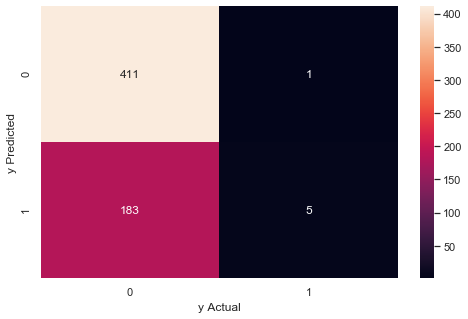

In [120]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Actual')
plt.ylabel('y Predicted')
plt.show()

- | actual Not Canceled | actual Canceled
- | - | -
__predicted Not Canceled__ | TN | FN
__predicted Canceled__ | FP | TP




Not Canceled (0), Canceled (1)

In [121]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       412
           1       0.83      0.03      0.05       188

    accuracy                           0.69       600
   macro avg       0.76      0.51      0.43       600
weighted avg       0.74      0.69      0.58       600



On this model, we can see that False Negative (Predicted 0, Actual 1). That is something that we need to be concerned about, because I think it is something that could produce the most loss for the company. If that happens, the company wrongly predict that someone that actually canceled the book, but noted that they are not cancelling their bookings. By that reason, the company did not gain money becuase those people did not pay the company.

### Random Forest Classifier

'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

'min_samples_leaf': [1, 2, 4],

'min_samples_split': [2, 5, 10],

'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [93]:
from sklearn.ensemble import RandomForestClassifier

model_RF1 = RandomForestClassifier(n_estimators=200,max_depth=10, min_samples_split=2, min_samples_leaf=1)
model_RF1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
y_pred = model_RF1.predict(x_test)

In [96]:
print(model_RF1.score(x_train,y_train))
print(model_RF1.score(x_test,y_test))

0.8274280950395998
0.69


In [105]:
param_RF = {
#     'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 10, 15, 20, 40, 60],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 4],
    'n_estimators' : [100, 200, 400, 600, 800, 1000],
    'bootstrap' : [True, False]
#     'max_features' : ['auto', 'sqrt', 'log2']
}

### Randomized Search CV

In [106]:
model_RF = RandomForestClassifier()
model_RF_RS = RandomizedSearchCV(
    model_RF, param_RF, cv = 10
    )

In [107]:
model_RF_RS.fit(x_train, y_train)
model_RF_RS.best_params_

{'n_estimators': 200,
 'min_samples_split': 20,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'bootstrap': False}

In [108]:
model_LogReg_Asli.score(x_test, y_test)

0.6933333333333334

In [110]:
model_RF_RS.fit(x_train, y_train)
model_RF_RS.score(x_test, y_test)

0.6916666666666667

### Evaluating Model

In [111]:
confusion_matrix(y_test,y_pred)

array([[378,  34],
       [152,  36]])

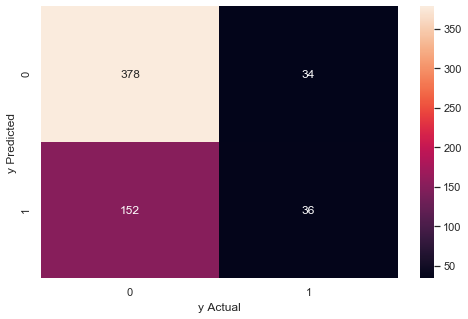

In [112]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Actual')
plt.ylabel('y Predicted')
plt.show()

- | actual Not Canceled | actual Canceled
- | - | -
__predicted Not Canceled__ | TN | FN
__predicted Canceled__ | FP | TP




Not Canceled (0), Canceled (1)

On this model, we can see that False Negative (Predicted 0, Actual 1). That is something that we need to be concerned about, because I think it is something that could produce the most loss for the company. If that happens, the company wrongly predict that someone that actually canceled the book, but noted that they are not cancelling their bookings. By that reason, the company did not gain money becuase those people did not pay the company

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       412
           1       0.51      0.19      0.28       188

    accuracy                           0.69       600
   macro avg       0.61      0.55      0.54       600
weighted avg       0.65      0.69      0.64       600



In [66]:
model.score(x_train,y_train)

0.988328470195915

In [67]:
model.score(x_test,y_test)

0.6416666666666667